In [1]:
#director,writer
#actor if I can get to it
# Here I will work on the first recommendation
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3

In [2]:
#file_paths
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'


In [3]:
# compressed file is too large for github, file path for extracted files specified below
#creating the tn_budgets_df data Frame
tn_budgets_df = pd.read_csv(tn_budgets_file_path)

In [4]:
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [5]:
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [ ]:
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [ ]:
#delete all rows with zeros
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [6]:
tn_budgets_df['gross_revenue'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [7]:
tn_budgets_df = tn_budgets_df.loc[tn_budgets_df['gross_revenue'] != 0]

In [8]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,worldwide_gross_float,gross_revenue
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,1.316722e+09,9.997217e+08


In [9]:
tn_budgets_df = tn_budgets_df.drop(['release_date','id','production_budget','domestic_gross','worldwide_gross'],axis=1)

In [10]:
tn_budgets_df.head()

,movie,production_budget_float,worldwide_gross_float,gross_revenue
0,Avatar,425000000.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08


In [11]:
# compressed file is too large for github, file path for extracted files specified below
conn = sqlite3.connect(imdb_file_path) 

imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [12]:
movie_basics_table = pd.read_sql('''
                               SELECT
                               movie_id,primary_title
                               FROM movie_basics
                               ''', conn)

In [13]:
movie_basics_table.head()

,movie_id,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera


In [14]:
persons_table = pd.read_sql('''
                               SELECT
                               person_id,primary_name
                               FROM persons
                               ''', conn)

In [15]:
persons_table.head()

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [17]:
directors_table = pd.read_sql('''
                               SELECT
                               *
                               FROM directors
                               ''', conn)

In [18]:
directors_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [19]:
directors_df = pd.merge(directors_table, persons_table,left_on='person_id',right_on='person_id')

In [20]:
directors_df = pd.merge(directors_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [21]:
directors_df.head()

,movie_id,person_id,primary_name,primary_title
0,tt0285252,nm0899854,Tony Vitale,Life's a Beach
1,tt0462036,nm1940585,Bill Haley,Steve Phoenix: The Untold Story
2,tt0835418,nm0151540,Jay Chandrasekhar,The Babymakers
3,tt0835418,nm0151540,Jay Chandrasekhar,The Babymakers
4,tt0859635,nm0151540,Jay Chandrasekhar,Super Troopers 2


In [22]:
directors_df = pd.merge(tn_budgets_df,directors_df, how='inner',left_on='movie',right_on='primary_title')

In [23]:
directors_df.head()

,movie,production_budget_float,worldwide_gross_float,gross_revenue,movie_id,person_id,primary_name,primary_title
0,Avatar,425000000.0,2.776345e+09,2.351345e+09,tt1775309,nm3786927,Atsushi Wada,Avatar
1,Avatar,425000000.0,2.776345e+09,2.351345e+09,tt1775309,nm3786927,Atsushi Wada,Avatar
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,tt1298650,nm0551128,Rob Marshall,Pirates of the Caribbean: On Stranger Tides
3,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,tt1298650,nm0551128,Rob Marshall,Pirates of the Caribbean: On Stranger Tides
4,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,tt1298650,nm0551128,Rob Marshall,Pirates of the Caribbean: On Stranger Tides


In [24]:
new_directors = directors_df.groupby(by=['primary_name'],as_index=False).mean()

In [25]:
new_directors.head()

,primary_name,production_budget_float,worldwide_gross_float,gross_revenue
0,Aaron Agrasanchez,35000000.0,57897191.0,22897191.0
1,Aaron Alon,2100000.0,1381824.0,-718176.0
2,Aaron Hann,2000000.0,10024.0,-1989976.0
3,Aaron Schnobrich,2000000.0,2350641.0,350641.0
4,Aaron Seltzer,20000000.0,81424988.0,61424988.0


In [26]:
new_directors = new_directors.sort_values(by=['gross_revenue'],ascending=False)
new_directors = new_directors[:10]
new_directors.head()

,primary_name,production_budget_float,worldwide_gross_float,gross_revenue
261,Atsushi Wada,425000000.0,2.776345e+09,2.351345e+09
2413,Ravi Punj,200000000.0,2.208208e+09,2.008208e+09
2317,Pete Meads,200000000.0,2.208208e+09,2.008208e+09
1654,Kevin Lincoln,200000000.0,2.208208e+09,2.008208e+09
1384,Joe Russo,251600000.0,1.456754e+09,1.205154e+09


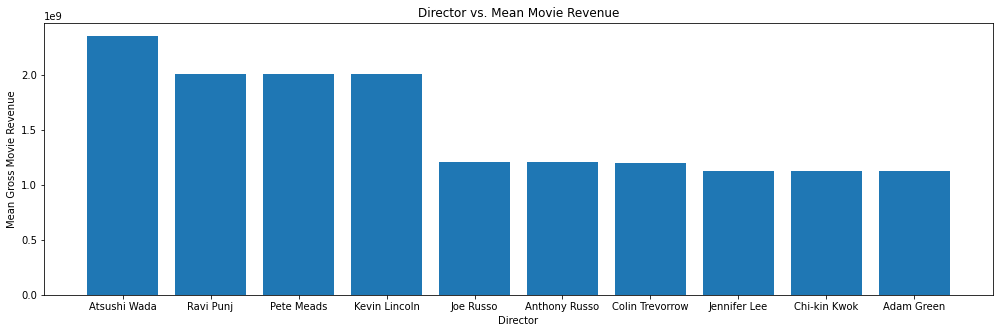

In [28]:
fig,ax = plt.subplots(figsize=(17,5))
ax.bar(new_directors['primary_name'],new_directors['gross_revenue'])
ax.set_xlabel('Director')
ax.set_ylabel('Mean Gross Movie Revenue')
ax.set_title('Director vs. Mean Movie Revenue');